# FINA

## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [36]:
# Librerías

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests #this is for performing the pairwise tests


#import generic_funcions as gf
#import adherence_functions as af
import warnings
warnings.filterwarnings('ignore')

ruta_archivos = ''

## 2. Carga de Datos

In [37]:
base = pd.read_csv( ruta_archivos + 'base_adeherencia_features_0.csv', sep='|' )

totdas_var = base.columns[5:]

In [38]:
base.shape

(3663, 151)

In [39]:
quedan = []
for i in base.columns[5:]:
    ## A simple t test for difference of means
    t2, p2 = stats.ttest_ind(base.loc[base['adeherencia_0'] == 0, i].dropna(),base.loc[base['adeherencia_0'] == 1, i].dropna())
    if p2<0.05:
        quedan.append(i)


##  Arbol

In [40]:
# Será util numpy.argsort(vals)

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


base_ = base.fillna(-1)
print(base_.shape)
X = base_[base.columns[5:]] # Features
y = base_['adeherencia_0'] # Target variable

(3663, 151)


In [41]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3)

# Train Decision Tree Classifer
clf = clf.fit(X,y)

In [42]:
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'importance'})
importances.reset_index(inplace = True)

In [43]:
arbol = list(importances[importances['importance'] > 0].sort_values('importance', ascending = False)['index'])

# Gente en 3 años

In [44]:
id2017 = base[base['year'] == 2017]['id'].unique()
id2018 = base[base['year'] == 2018]['id'].unique()
id2019 = base[base['year'] == 2019]['id'].unique()

mask = np.isin(id2019,id2018[np.isin(id2018,id2017)])
id_final = id2019[mask]

In [45]:
base_3 = base[base['id'].isin(id_final)]

In [46]:
base_3.shape

(1747, 151)

In [47]:
len(base_3['id'].value_counts())

217

### Prueba `t`

In [48]:
quedan3 = []
for i in base_3.columns[5:]:
    ## A simple t test for difference of means
    t2, p2 = stats.ttest_ind(base_3.loc[base_3['adeherencia_0'] == 0, i].dropna(),base_3.loc[base_3['adeherencia_0'] == 1, i].dropna())
    if p2<0.05:
        quedan3.append(i)

###  Arbol

In [49]:
base_ = base_3.fillna(-1)
X = base_[base.columns[5:]] # Features
y = base_['adeherencia_0'] # Target variable

In [50]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3)

# Train Decision Tree Classifer
clf = clf.fit(X,y)

In [51]:
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'importance'})
importances.reset_index(inplace = True)

In [52]:
arbol3 = list(importances[importances['importance'] > 0].sort_values('importance', ascending = False)['index'])

---------------------------------------------------------------------

# Pruebas #

## Logistic Regression

In [53]:
##--- Variables que quedan y filtro.

total = list(set(quedan)|set(arbol)|set(quedan3)|set(arbol3))
pocos = list((set(quedan)|set(arbol))& (set(quedan3)|set(arbol3)))
ids = ['id','year','month','adeherencia_0']
basef = base[ids + total].fillna(-1)
basef2 = base[ids + pocos].fillna(-1)

In [54]:
# --- vector de variables largo.
print(total)
print(len(total))

['anf_j_sum_12', 'hos_uce_sum_6', 'ant_j_sum_12', 'acd_ef_act_usu_avg_6', 'far_mis_si_flag', 'med_num_doses_j_avg_6', 'acd_falta_aire_avg_6', 'far_gra_leve_sum_6', 'med_num_dis_sum_12', 'hos_uce_j_sum_6', 'far_cau_otra_sum_12', 'cal_ent_foto', 'inc_inc_sum_12', 'med_num_doses_j_avg_12', 'hos_est_sum_6', 'med_num_doses_otra_avg_12', 'hos_uce_j_sum_12', 'hos_est_j_sum_6', 'epo_4_sum_12', 'med_num_dis_sum_6', 'inc_con_sum_6', 'acd_uso_inhal_avg_12', 'bio_omalizumab_avg_6', 'inc_inc_sum_6', 'epo_4_sum_6', 'imc_foto', 'med_flag_otra_sum_6', 'far_gra_mod_sum_6', 'act_punt_control_avg_12', 'med_flag_j_sum_6', 'med_num_doses_otra_avg_6', 'hos_uce_sum_12', 'med_flag_j_sum_12', 'med_flag_otra_sum_12']
34


In [55]:
# --- vector de variables corto.
print(pocos)
print(len(pocos))

['hos_uce_sum_6', 'ant_j_sum_12', 'med_flag_otra_sum_12', 'med_num_dis_sum_12', 'hos_uce_j_sum_6', 'inc_inc_sum_12', 'hos_est_sum_6', 'med_num_doses_otra_avg_12', 'hos_uce_j_sum_12', 'hos_est_j_sum_6', 'epo_4_sum_12', 'med_num_dis_sum_6', 'inc_inc_sum_6', 'epo_4_sum_6', 'med_flag_otra_sum_6', 'med_num_doses_otra_avg_6', 'hos_uce_sum_12', 'med_flag_j_sum_12', 'far_gra_leve_sum_6']
19


In [56]:
Xt = basef[total]
yt = basef['adeherencia_0']

logit_model=sm.Logit(yt,Xt)
result=logit_model.fit()

ver = result.summary2().tables[1].reset_index()
verl = list(ver[ver['P>|z|']<=0.1]['index'])
print(verl)

Optimization terminated successfully.
         Current function value: 0.521240
         Iterations 6
['anf_j_sum_12', 'ant_j_sum_12', 'far_gra_leve_sum_6', 'far_cau_otra_sum_12', 'inc_inc_sum_12', 'inc_con_sum_6', 'bio_omalizumab_avg_6', 'imc_foto', 'act_punt_control_avg_12']


In [57]:
Xp = basef2[pocos]
yp = basef2['adeherencia_0']

logit_model2=sm.Logit(yp,Xp)
result2=logit_model2.fit()

ver2 = result2.summary2().tables[1].reset_index()
verl2 = list(ver2[ver2['P>|z|']<=0.1]['index'])
print(verl2)

Optimization terminated successfully.
         Current function value: 0.540041
         Iterations 6
['ant_j_sum_12', 'hos_uce_j_sum_6', 'inc_inc_sum_12', 'epo_4_sum_6', 'far_gra_leve_sum_6']


Refinando los modelos, y haciendo separación train test:

### Modelo total.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Xt2 = basef[verl]

X_train, X_test, y_train, y_test = train_test_split(Xt2, yt, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.77


### Modelo pocas.

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Xt3 = basef2[verl2]

X_train, X_test, y_train, y_test = train_test_split(Xt3, yt, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


---------------------------------------------------

In [62]:
base_['anf_j_sum_12'].unique()

array([-1.])

In [63]:
fdT = base_[total]

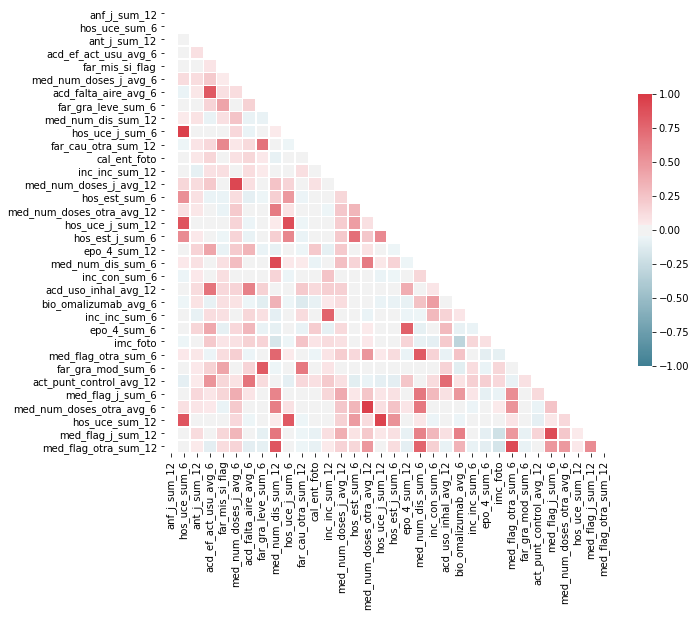

In [64]:
#compute correlation matrix
for c in fdT.columns :
    fdT[c] = fdT[c].astype(float)

df_correlations = fdT.corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_correlations,mask=mask,  vmax=1, vmin=-1, cmap=cmap, 
            center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [65]:
df_correlations.head()
for i in df_correlations.columns:
    aux = df_correlations[(abs(df_correlations[i])>=0.7)&(abs(df_correlations[i])!=1)][i]
    print(i)
    print(aux,'\n')

anf_j_sum_12
Series([], Name: anf_j_sum_12, dtype: float64) 

hos_uce_sum_6
hos_uce_j_sum_6     0.961390
hos_uce_j_sum_12    0.852618
hos_uce_sum_12      0.846916
Name: hos_uce_sum_6, dtype: float64 

ant_j_sum_12
Series([], Name: ant_j_sum_12, dtype: float64) 

acd_ef_act_usu_avg_6
acd_falta_aire_avg_6    0.833938
Name: acd_ef_act_usu_avg_6, dtype: float64 

far_mis_si_flag
Series([], Name: far_mis_si_flag, dtype: float64) 

med_num_doses_j_avg_6
med_num_doses_j_avg_12    0.928094
Name: med_num_doses_j_avg_6, dtype: float64 

acd_falta_aire_avg_6
acd_ef_act_usu_avg_6    0.833938
Name: acd_falta_aire_avg_6, dtype: float64 

far_gra_leve_sum_6
far_gra_mod_sum_6    0.822734
Name: far_gra_leve_sum_6, dtype: float64 

med_num_dis_sum_12
med_num_dis_sum_6       0.912854
med_flag_otra_sum_6     0.757779
med_flag_otra_sum_12    0.844594
Name: med_num_dis_sum_12, dtype: float64 

hos_uce_j_sum_6
hos_uce_sum_6       0.961390
hos_uce_j_sum_12    0.889766
hos_uce_sum_12      0.828687
Name: hos_uc

In [75]:
vec = ['acd_falta_aire_avg_6',
'act_punt_control_avg_12',
'anf_j_sum_12',
'ant_j_sum_12',
'bio_omalizumab_avg_6',
'cal_ent_foto',
'epo_4_sum_6',
'far_cau_otra_sum_12',
'far_gra_leve_sum_6',
'far_mis_si_flag',
'hos_est_j_sum_6',
'hos_est_sum_6',
'hos_uce_j_sum_6',
'inc_con_sum_6',
'inc_inc_sum_12',
'med_flag_j_sum_12',
'med_flag_otra_sum_12',
'med_num_dis_sum_12',
'med_num_doses_j_avg_12',
'med_num_doses_otra_avg_12']


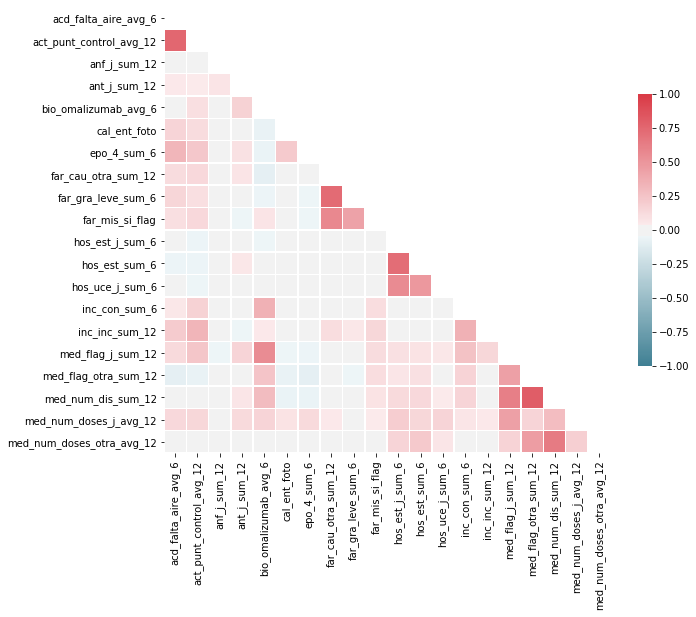

In [76]:
df_correlations = base.fillna(-1)[vec].corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_correlations,mask=mask,  vmax=1, vmin=-1, cmap=cmap, 
            center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [78]:
base_nueva = base[ids + vec] 

In [202]:
base_nueva.fillna(-1,inplace = True)
base_nueva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3663 non-null   int64  
 1   year                       3663 non-null   int64  
 2   month                      3663 non-null   int64  
 3   adeherencia_0              3663 non-null   int64  
 4   acd_falta_aire_avg_6       3663 non-null   float64
 5   act_punt_control_avg_12    3663 non-null   float64
 6   anf_j_sum_12               3663 non-null   float64
 7   ant_j_sum_12               3663 non-null   float64
 8   bio_omalizumab_avg_6       3663 non-null   float64
 9   cal_ent_foto               3663 non-null   float64
 10  epo_4_sum_6                3663 non-null   float64
 11  far_cau_otra_sum_12        3663 non-null   float64
 12  far_gra_leve_sum_6         3663 non-null   float64
 13  far_mis_si_flag            3663 non-null   float

----------------------------------------------------

In [227]:
datosbasicos = pd.read_csv( ruta_archivos + 'DatosBasicos.csv', sep='|' )
#datosbasicos.info()
db1 = datosbasicos.dropna()
db1 = db1.drop_duplicates()
db1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 0 to 887
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           860 non-null    int64  
 1   id                   860 non-null    int64  
 2   genero               860 non-null    object 
 3   escolaridad          860 non-null    object 
 4   estadocivil          860 non-null    object 
 5   departamento         860 non-null    object 
 6   ciudad               860 non-null    object 
 7   estrato              860 non-null    float64
 8   zona                 860 non-null    object 
 9   nivelsocioeconomico  860 non-null    object 
 10  ocupacion            860 non-null    object 
 11  fecha_n              860 non-null    object 
 12  year_n               860 non-null    float64
 13  month_n              860 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 100.8+ KB


In [203]:
Agregada = base_nueva.merge(db1, on="id",how ='left')

In [204]:
Agregada['edad'] = round((Agregada['year'] - Agregada['year_n']) + (Agregada['month'] - Agregada['month_n'])/12,0)

In [205]:
Agregada.drop(columns=['Unnamed: 0', 'fecha_n', 'year_n', 'month_n'], inplace= True)

In [206]:
categorias = ['genero', 'escolaridad', 'estadocivil',
       'departamento', 'ciudad', 'zona', 'nivelsocioeconomico',
       'ocupacion',]

In [207]:
for i in categorias:
    Agregada[i] = Agregada[i].astype('category')

In [208]:
Agregada.columns

Index(['id', 'year', 'month', 'adeherencia_0', 'acd_falta_aire_avg_6',
       'act_punt_control_avg_12', 'anf_j_sum_12', 'ant_j_sum_12',
       'bio_omalizumab_avg_6', 'cal_ent_foto', 'epo_4_sum_6',
       'far_cau_otra_sum_12', 'far_gra_leve_sum_6', 'far_mis_si_flag',
       'hos_est_j_sum_6', 'hos_est_sum_6', 'hos_uce_j_sum_6', 'inc_con_sum_6',
       'inc_inc_sum_12', 'med_flag_j_sum_12', 'med_flag_otra_sum_12',
       'med_num_dis_sum_12', 'med_num_doses_j_avg_12',
       'med_num_doses_otra_avg_12', 'genero', 'escolaridad', 'estadocivil',
       'departamento', 'ciudad', 'estrato', 'zona', 'nivelsocioeconomico',
       'ocupacion', 'edad'],
      dtype='object')

In [209]:
Agregada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3709 entries, 0 to 3708
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         3709 non-null   int64   
 1   year                       3709 non-null   int64   
 2   month                      3709 non-null   int64   
 3   adeherencia_0              3709 non-null   int64   
 4   acd_falta_aire_avg_6       3709 non-null   float64 
 5   act_punt_control_avg_12    3709 non-null   float64 
 6   anf_j_sum_12               3709 non-null   float64 
 7   ant_j_sum_12               3709 non-null   float64 
 8   bio_omalizumab_avg_6       3709 non-null   float64 
 9   cal_ent_foto               3709 non-null   float64 
 10  epo_4_sum_6                3709 non-null   float64 
 11  far_cau_otra_sum_12        3709 non-null   float64 
 12  far_gra_leve_sum_6         3709 non-null   float64 
 13  far_mis_si_flag            3709 n

In [210]:
Agregada.dropna(inplace = True)

In [214]:
import pandas as pd
import pydotplus
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from io import StringIO
from IPython.display import Image, SVG
from graphviz import Source
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch
from scipy.stats import chi2_contingency, norm
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from statsmodels.formula.api import ols
from sympy import var, plot_implicit, Eq

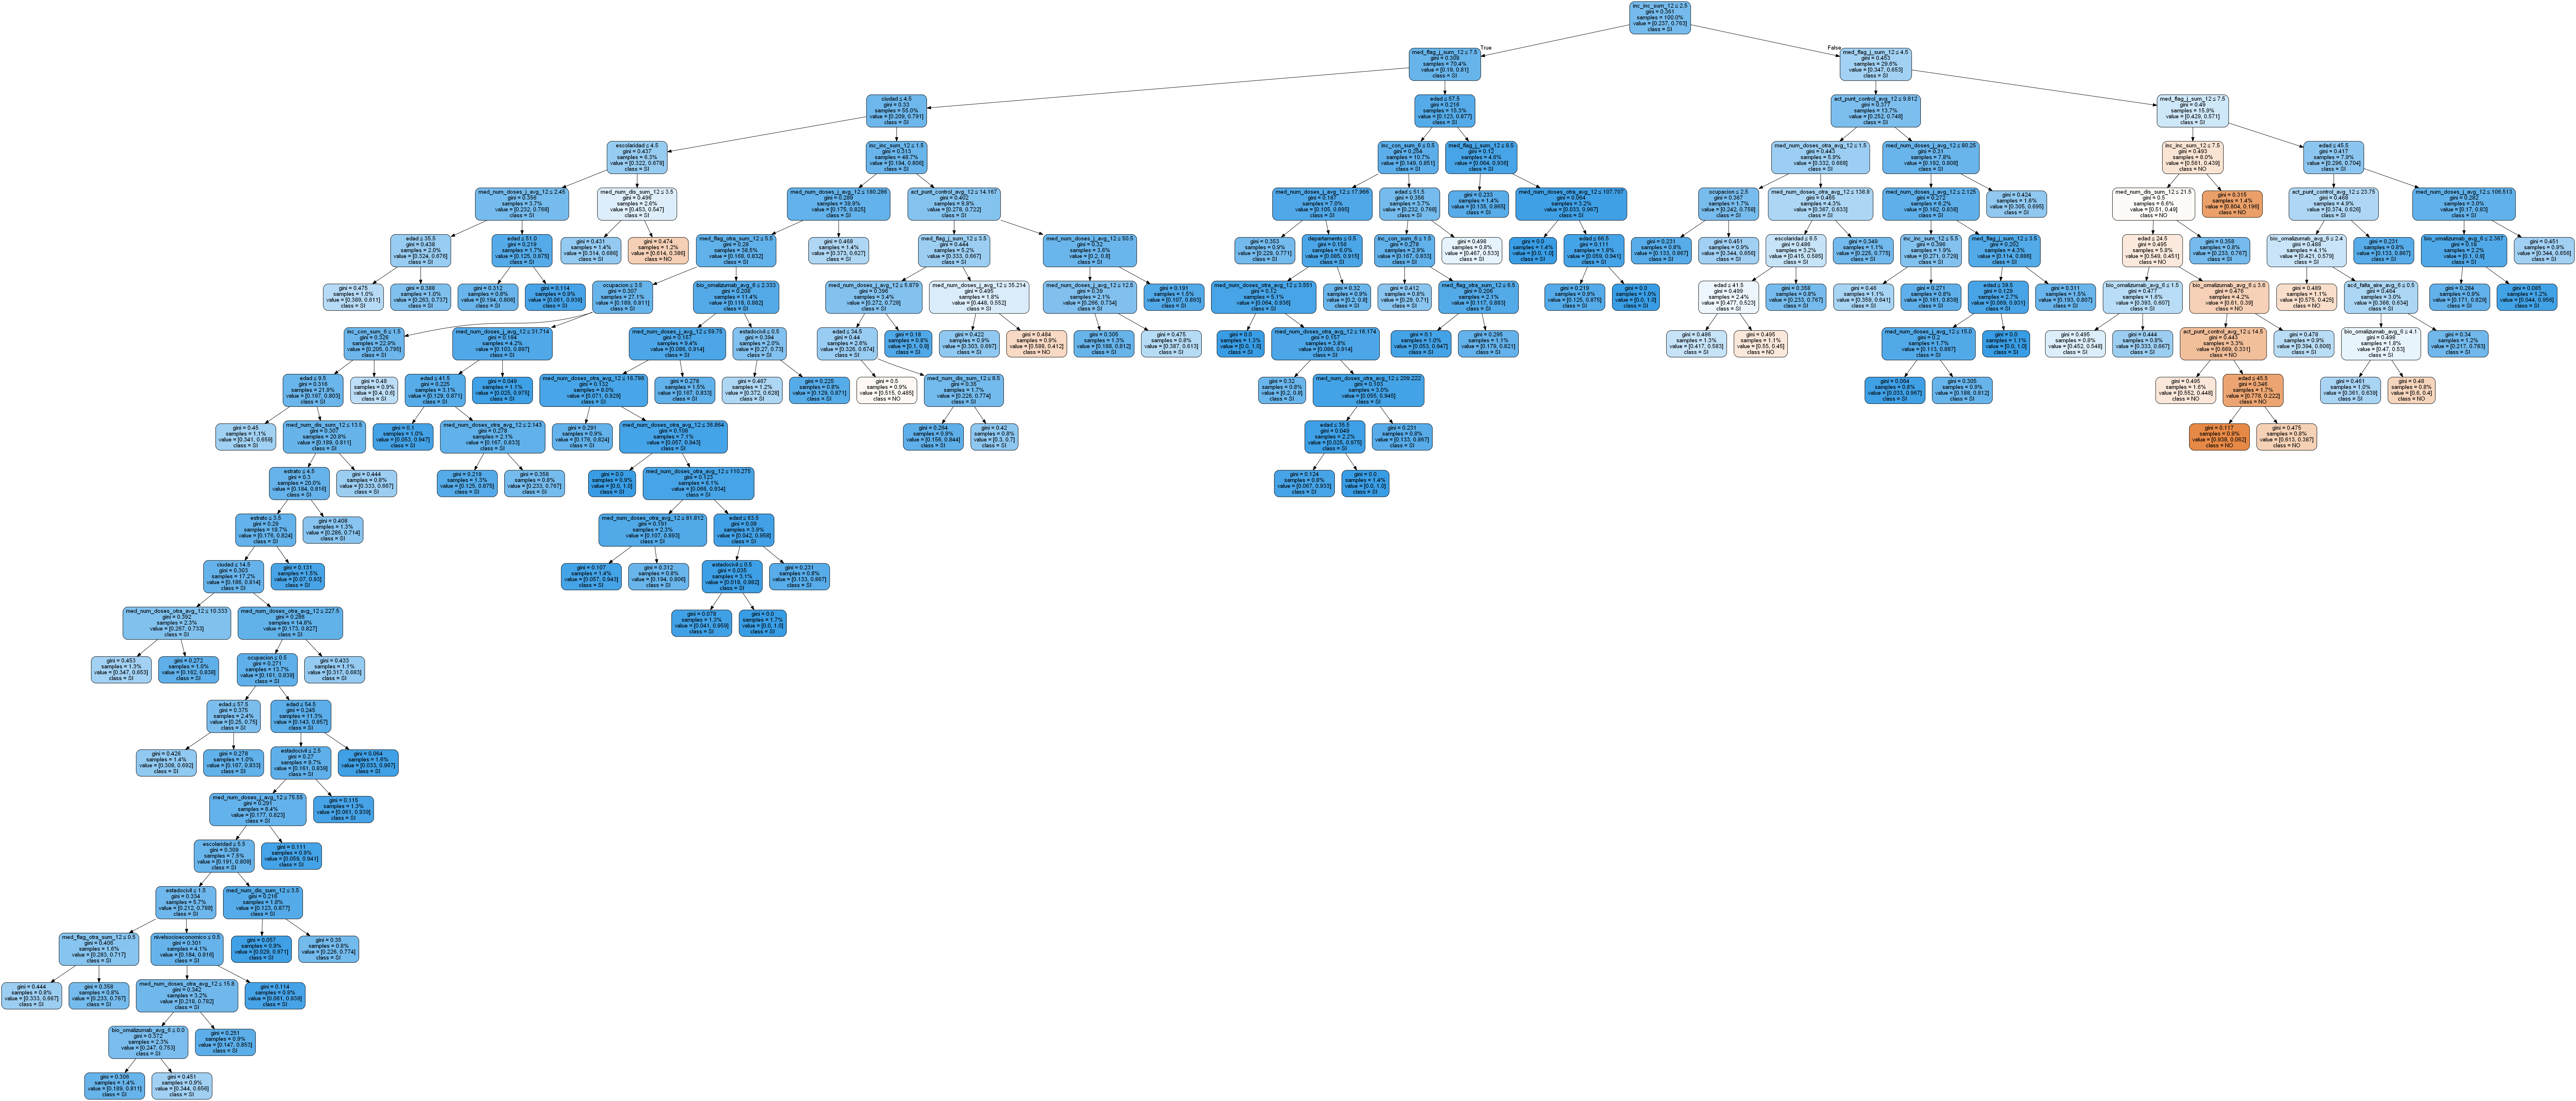

In [229]:
# NOTE: If you are using Docker please open a terminal and run the following command:
#         conda install graphviz
#       prior to running this cell.
# If you are on Windows, OSX or Linux, and not using Docker 
# install graphviz in your machine and add its bin folder to your PATH
# You can follow the appropiate instructions for your OS

df_t=Agregada.copy()
for var in categorias:
    df_t[var]=df_t[var].cat.codes


clf = DecisionTreeClassifier( min_samples_leaf = 30)

# Train Decision Tree Classifer
covariates=['genero', 'escolaridad', 'estadocivil', 'departamento', 'ciudad',
       'estrato', 'zona', 'nivelsocioeconomico', 'ocupacion',
            'acd_falta_aire_avg_6', 'act_punt_control_avg_12',
       'anf_j_sum_12', 'ant_j_sum_12', 'bio_omalizumab_avg_6', 'cal_ent_foto',
       'epo_4_sum_6', 'far_cau_otra_sum_12', 'far_gra_leve_sum_6',
       'far_mis_si_flag', 'hos_est_j_sum_6', 'hos_est_sum_6',
       'hos_uce_j_sum_6', 'inc_con_sum_6', 'inc_inc_sum_12',
       'med_flag_j_sum_12', 'med_flag_otra_sum_12', 'med_num_dis_sum_12',
       'med_num_doses_j_avg_12', 'med_num_doses_otra_avg_12', 'edad']

clf = clf.fit(df_t[covariates], df_t['adeherencia_0'])

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names = covariates,
                class_names=['NO', 'SI'],  
                filled=True, rounded=True,
                special_characters=True, 
                impurity='gini', proportion=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())